In [1]:
from scipy import datasets
from PIL import Image, ImageOps
import ipywidgets as widgets
from ipywidgets import interact
from IPython.display import display
import numpy as np

In [2]:
original = Image.fromarray(datasets.face(gray=True))

In [3]:
def update_image(blackpoint, midpoint, whitepoint):
    colorized = ImageOps.colorize(
        original,
        black="blue",
        white="red",
        mid="green",
        blackpoint=blackpoint,
        whitepoint=whitepoint,
        midpoint=midpoint
    )
    display(ImageOps.autocontrast(colorized))

In [4]:
def update_midpoint_range(*args):
    midpoint_slider.max = whitepoint_slider.value
    midpoint_slider.min = blackpoint_slider.value
    if midpoint_slider.value > midpoint_slider.max:
        midpoint_slider.value = midpoint_slider.max
    if midpoint_slider.value < midpoint_slider.min:
        midpoint_slider.value = midpoint_slider.min

def update_whitepoint_range(*args):
    whitepoint_slider.min = midpoint_slider.value
    if whitepoint_slider.value < whitepoint_slider.min:
        whitepoint_slider.value = whitepoint_slider.min

def update_blackpoint_range(*args):
    blackpoint_slider.max = midpoint_slider.value
    if blackpoint_slider.value > blackpoint_slider.max:
        blackpoint_slider.value = blackpoint_slider.max

In [5]:
blackpoint_slider = widgets.IntSlider(
    value=20,
    min=0,
    max=127,
    step=1,
    description='Blackpoint:',
    continuous_update=False
)

midpoint_slider = widgets.IntSlider(
    value=100,
    min=0,
    max=255,
    step=1,
    description='Midpoint:',
    continuous_update=False
)

whitepoint_slider = widgets.IntSlider(
    value=225,
    min=127,
    max=255,
    step=1,
    description='Whitepoint:',
    continuous_update=False
)

In [6]:
whitepoint_slider.observe(update_midpoint_range, names='value')
midpoint_slider.observe(lambda _: (update_whitepoint_range(), update_blackpoint_range()), names='value')
blackpoint_slider.observe(update_midpoint_range, names='value')

In [7]:
interact(
    update_image,
    blackpoint=blackpoint_slider,
    midpoint=midpoint_slider,
    whitepoint=whitepoint_slider
)

interactive(children=(IntSlider(value=20, continuous_update=False, description='Blackpoint:', max=127), IntSli…

<function __main__.update_image(blackpoint, midpoint, whitepoint)>

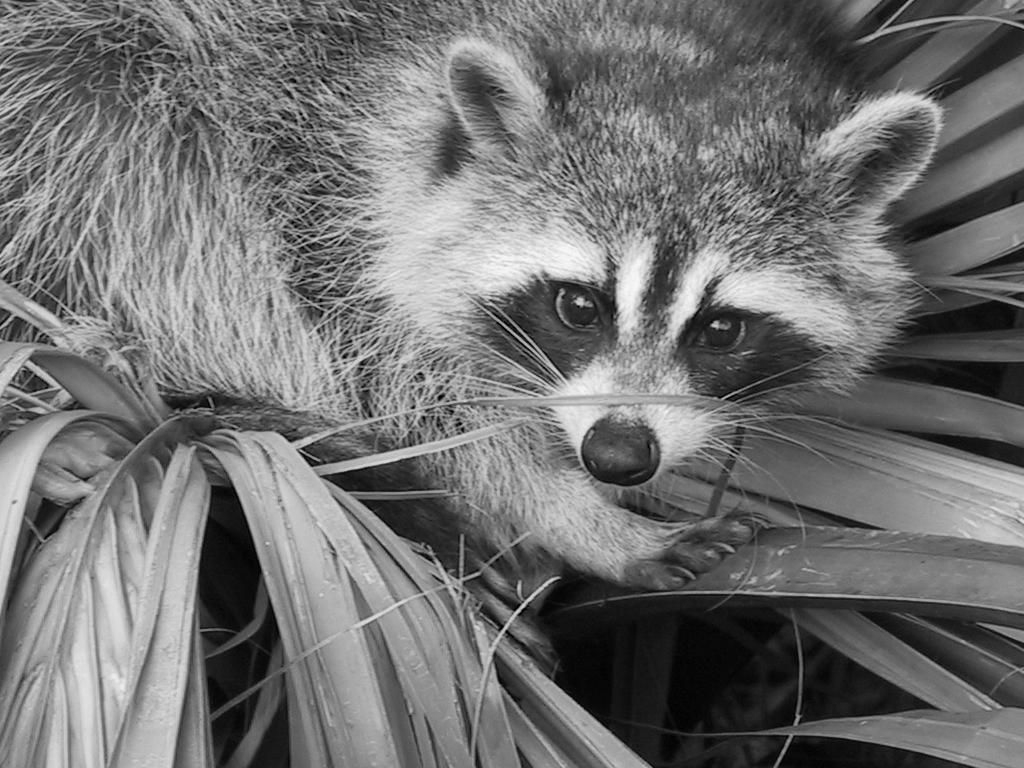

In [8]:
original

In [9]:
width, height = original.size

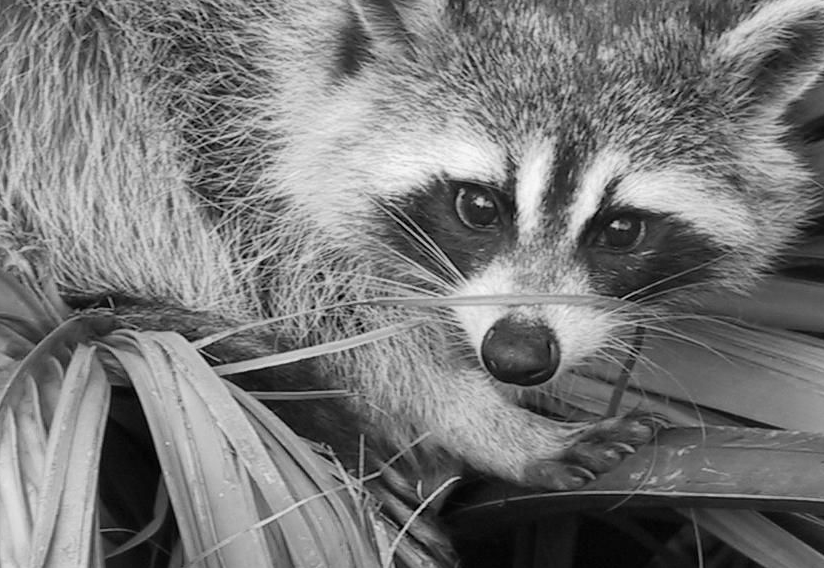

In [10]:
cropped = original.crop((100, 100, width-100, height-100))
cropped

In [11]:
def update_circle(x, y, r):
    face = np.array(original, dtype=np.uint8).copy()
    y_coords, x_coords = np.ogrid[:height, :width]

    mask = ((x_coords - x)**2 + (y_coords - y)**2) > r**2

    face[mask] = 33
    
    return Image.fromarray(face)

In [12]:
x_slider = widgets.IntSlider(
    value=636,
    min=0,
    max=width,
    step=1,
    description='X position:'
)

y_slider = widgets.IntSlider(
    value=316,
    min=0,
    max=height,
    step=1,
    description='Y position:'
)

r_slider = widgets.IntSlider(
    value=191,
    min=0,
    max=width,
    step=1,
    description='Radius:'
)

interact(update_circle, x=x_slider, y=y_slider, r=r_slider)

interactive(children=(IntSlider(value=636, description='X position:', max=1024), IntSlider(value=316, descript…

<function __main__.update_circle(x, y, r)>

In [13]:
def update_ellipse(x, y, rx, ry):
    face = np.array(original, dtype=np.uint8).copy()
    y_coords, x_coords = np.ogrid[:height, :width]

    # Уравнение эллипса: (x-h)²/a² + (y-k)²/b² > 1
    # где (h,k) это центр, a это горизонтальный радиус, b - вертикальный
    mask = ((x_coords - x)**2 / rx**2 + (y_coords - y)**2 / ry**2) > 1

    face[mask] = 33
    
    return Image.fromarray(face)

In [14]:
x_slider = widgets.IntSlider(
    value=627,
    min=0,
    max=width,
    step=1,
    description='X position:'
)

y_slider = widgets.IntSlider(
    value=341,
    min=0,
    max=height,
    step=1,
    description='Y position:'
)

rx_slider = widgets.IntSlider(
    value=200,
    min=10,
    max=width//2,
    step=1,
    description='Horizontal radius:'
)

ry_slider = widgets.IntSlider(
    value=150,
    min=10,
    max=height//2,
    step=1,
    description='Vertical radius:'
)

interact(update_ellipse, x=x_slider, y=y_slider, rx=rx_slider, ry=ry_slider)

interactive(children=(IntSlider(value=627, description='X position:', max=1024), IntSlider(value=341, descript…

<function __main__.update_ellipse(x, y, rx, ry)>